In [60]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [61]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [76]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        std = math.sqrt(noise(X,w,y))
        return np.sum(np.log(np.cosh((y1-y)/std)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        print(std)
        return -sum(np.log(np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [84]:
#gradient functions
def grad(X, y, h, err,std=0):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh((h-y)/std))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [78]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [79]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [80]:
def grd_des(x, y, order=1, err=0, basis=0, tol = 10**-5, numIters = 1000, learningRate = 10**-8):
    n = len(x)
    w = np.random.normal(0,0.1,(order + 1))          
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    Cost = []
    for i in range(numIters):
            h = hypothesis(x, w, 0)
            std = math.sqrt(noise(x,w,y))
            w += -learningRate * grad(X, y, h, err,std)
            cost = error(x, y, w, err , 0)
            Cost.append(cost)         
        
    
    plt.figure(1)
    plt.scatter(x,y,c='b')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('Using gradient descent')
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(Cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [81]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = grd_des(X_train, Y_train, order, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

log_cosh_loss
Calculating w by gradient descent
Polynomial Order:1
-0.35 + 1.07x^1
Using gradient descent


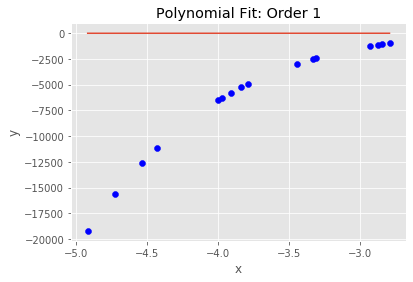

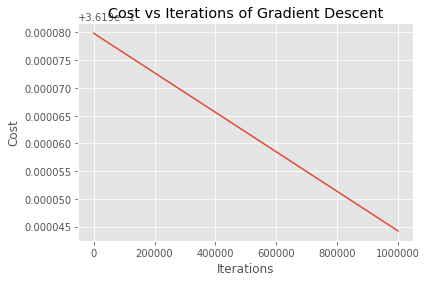

Training Cost: 0.361944223675442
Testing Cost: 0.3733043154023113
Noise: 81117492.70636177
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:2
-0.39 + 1.03x^1 + -4.41x^2
Using gradient descent


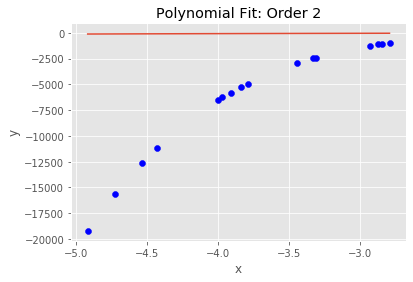

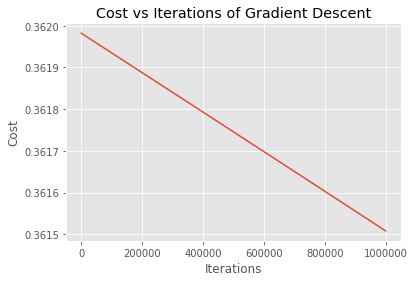

Training Cost: 0.3615080645596761
Testing Cost: 0.3730055834244519
Noise: 79970241.20896569
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:3
-0.20 + 0.94x^1 + -4.40x^2 + 18.67x^3
Using gradient descent


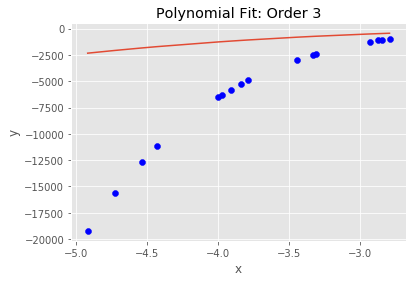

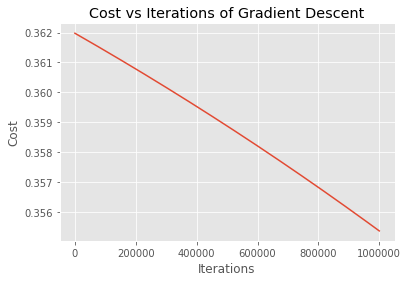

Training Cost: 0.3553701475957716
Testing Cost: 0.36869995674832506
Noise: 59748986.11911432
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:4
-0.04 + -0.02x^1 + -0.29x^2 + 4.41x^3 + -27.49x^4
Using gradient descent


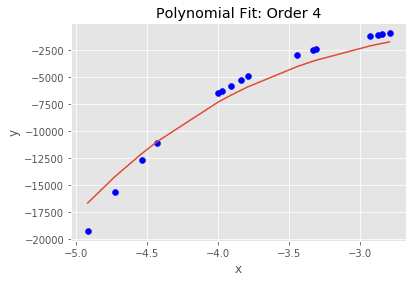

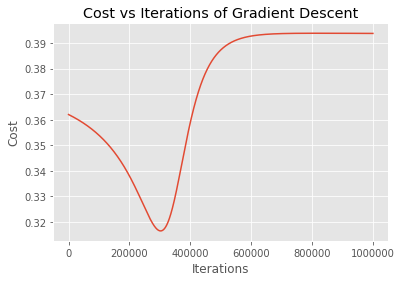

Training Cost: 0.39374471846825326
Testing Cost: 0.371480080866701
Noise: 1549009.0299573794
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:5
0.13 + -0.30x^1 + 1.12x^2 + -2.74x^3 + 4.72x^4 + 7.75x^5
Using gradient descent


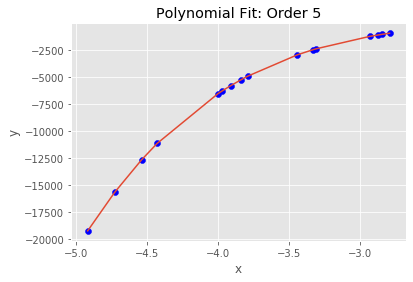

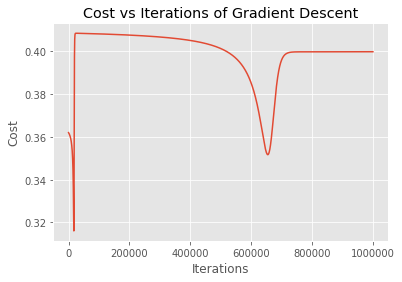

Training Cost: 0.3998423608077912
Testing Cost: 0.3923430289278667
Noise: 30.531180898302246
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:6
-0.01 + -0.09x^1 + 0.04x^2 + -0.09x^3 + -0.96x^4 + 4.49x^5 + -0.41x^6
Using gradient descent


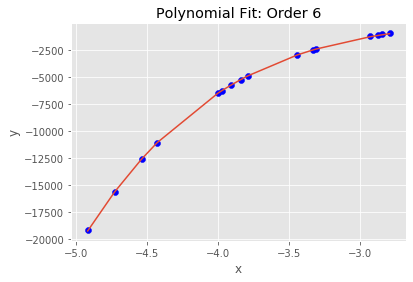

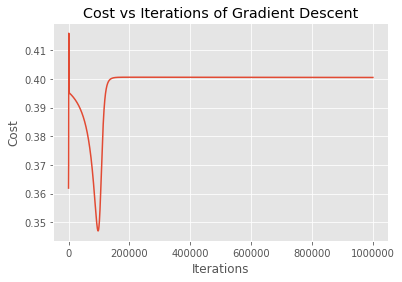

Training Cost: 0.40047494402978057
Testing Cost: 0.3856229204693097
Noise: 1254.852639102467
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:7
0.12 + -0.18x^1 + -0.09x^2 + 0.50x^3 + -0.96x^4 + 1.71x^5 + -1.70x^6 + -0.15x^7
Using gradient descent


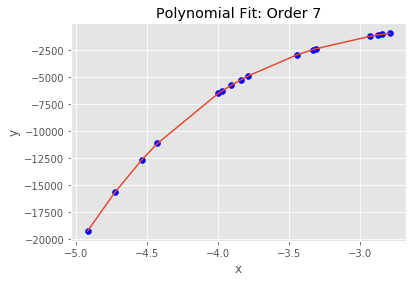

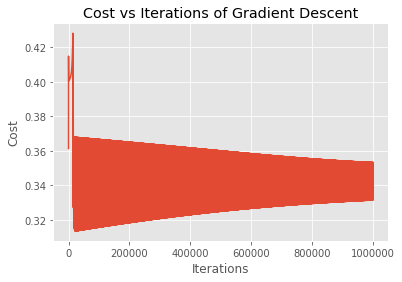

Training Cost: 0.35322568735570226
Testing Cost: 0.37990390327012785
Noise: 655.2593077402796
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:8
-0.08 + 0.07x^1 + -0.20x^2 + 0.15x^3 + -0.57x^4 + 1.42x^5 + -1.77x^6 + -0.11x^7 + 0.00x^8
Using gradient descent


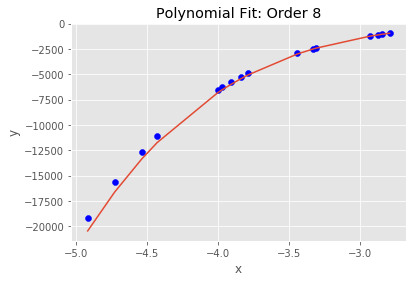

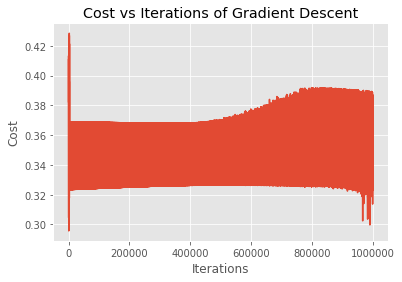

Training Cost: 0.33487313582960415
Testing Cost: 0.35543913306850383
Noise: 288518.35823669325
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:9
0.04 + 0.01x^1 + 0.03x^2 + 0.06x^3 + -0.09x^4 + 0.13x^5 + -0.63x^6 + 0.45x^7 + 0.01x^8 + -0.01x^9
Using gradient descent


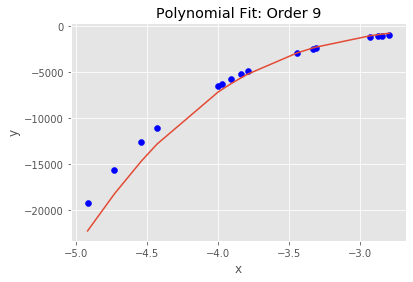

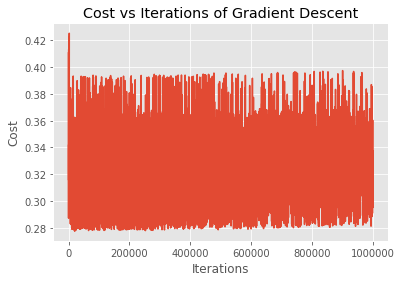

Training Cost: 0.3371464833406647
Testing Cost: 0.3599706232708084
Noise: 1811788.401790842


In [90]:
for i in range(1,10):
    main_f(i,1,20, 5, 1000000,10**-5, 0.0000005,2)